Power between 25 and 75 Hz: -6.02 dBFS, -40.00 dBFS/Hz


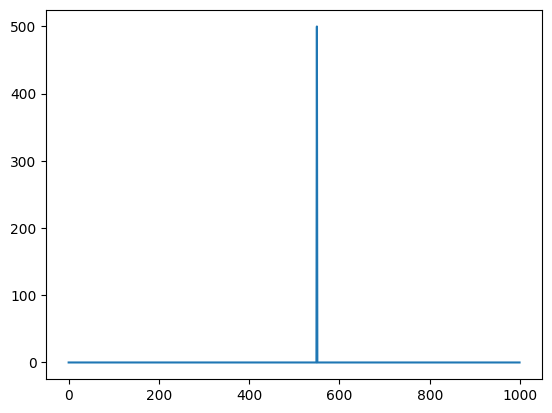

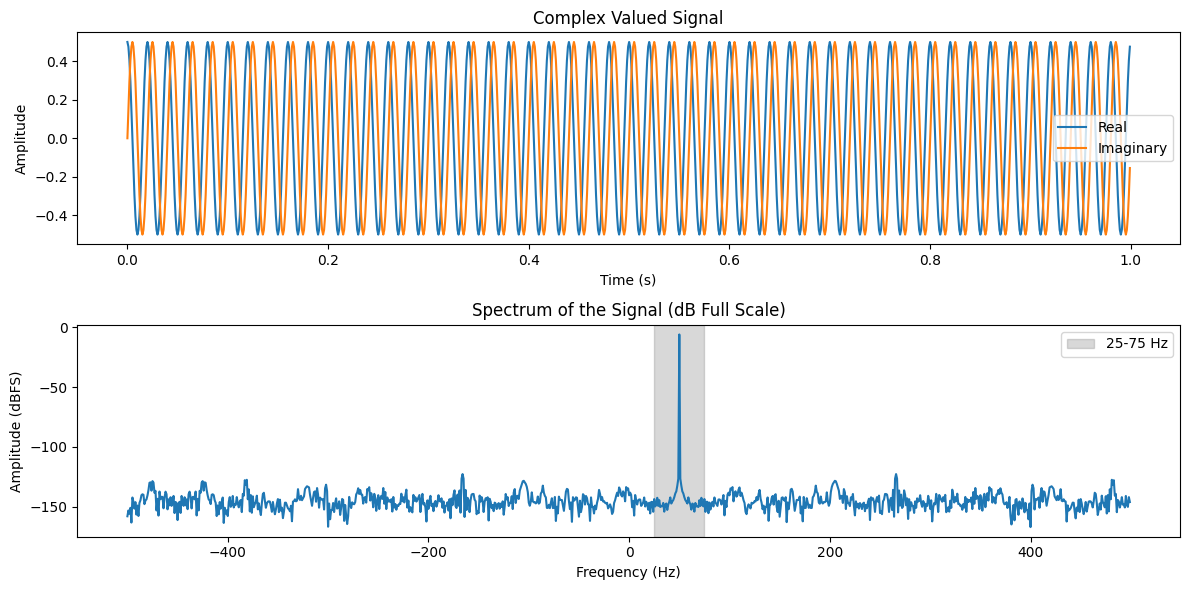

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
sampling_rate = 1000  # Hz
duration = 1  # seconds
frequency1 = 50  # Hz - Frequency of the first tone
frequency2 = 150  # Hz - Frequency of the second tone

# Band power parameters
low_frequency = 25  # Hz
high_frequency = 75  # Hz

# Time array
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False).astype(np.float32)

# Create a complex-valued signal with two tones
signal = 0.5 * np.exp(2j * np.pi * frequency1 * t) # + 0.505* np.exp(2j * np.pi * frequency2 * t)

# Simulate an ADC's clipping behavior
np.clip(signal.view(np.float32), -1, 1, out=signal.view(np.float32))

# Compute the spectrum using FFT
spectrum = np.fft.fft(signal)
spectrum = np.fft.fftshift(spectrum)
freq = np.fft.fftfreq(len(spectrum), 1 / sampling_rate)
freq = np.fft.fftshift(freq)

# Calculate amplitude in dBFS
max_amplitude = 1 * len(signal) # 1 because of ADC's normalized range
amplitude_dBFS = 20 * np.log10(np.abs(spectrum) / max_amplitude)

# Plot the original signal
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, signal.real, label='Real')
plt.plot(t, signal.imag, label='Imaginary')
plt.title('Complex Valued Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

# Plot the spectrum in dBFS
plt.subplot(2, 1, 2)
plt.plot(freq, amplitude_dBFS)

# Highlight the frequency range between low and high frequencies
plt.axvspan(low_frequency, high_frequency, color='gray', alpha=0.3, label=f'{low_frequency}-{high_frequency} Hz')

plt.title('Spectrum of the Signal (dB Full Scale)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dBFS)')
plt.legend()
plt.tight_layout()

# Calculate and print power between low and high frequencies in dBFS/Hz
band_power = np.sum(np.abs(spectrum[(freq >= low_frequency) & (freq <= high_frequency)])) / len(spectrum)
band_power_dBFS = 20 * np.log10(band_power)
band_power_dBFS_Hz = 20 * np.log10(band_power / (high_frequency - low_frequency))
print(f"Power between {low_frequency} and {high_frequency} Hz: {band_power_dBFS:.2f} dBFS, {band_power_dBFS_Hz:.2f} dBFS/Hz")

plt.show()